In [22]:
from google.colab import files
uploaded = files.upload()  # Появится кнопка для выбора файла
df = pd.read_csv(next(iter(uploaded.keys())))  # Автоматически загрузит CSV

Saving df_new_factors.csv to df_new_factors (3).csv


In [23]:
import pandas as pd
import statsmodels.api as sm


# One-Hot Encoding для категориальных переменных
df = pd.get_dummies(df, columns=['Бренд', 'Категория', 'Материал сумок', 'Ценовая категория', 'Метод производства'], drop_first=True)



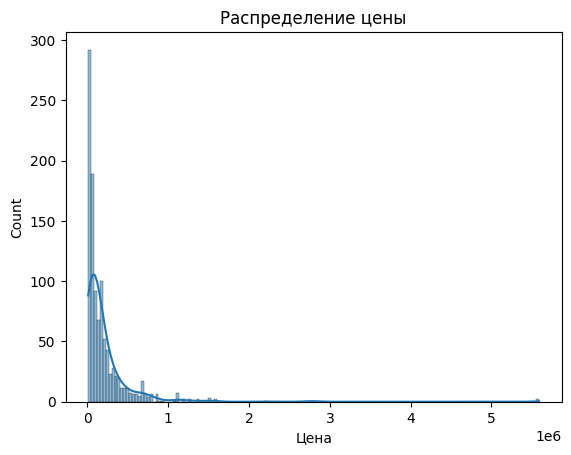

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# Гистограмма цены
sns.histplot(df['Цена'], kde=True)
plt.title('Распределение цены')
plt.show()

In [25]:
df

,Размер,Цвет,Длина ручки,Наличие пыльника,Состояние товара,Модель,Винтаж,Наличие коробки,Наличие сертификата,Легенда,...,Материал сумок_Хлопок,Материал сумок_Шелк,Материал сумок_Шерсть,Материал сумок_Экзотическая кожа,Ценовая категория_Доступные,Ценовая категория_Доступный люкс,Ценовая категория_Люксовые,Ценовая категория_Экстремально люксовые,Метод производства_Произведенные на фабрике,Метод производства_Сделанные вручную
0,INT L,Серебряный,Средние ручки,1,Отличное состояние,Ordinary,0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
1,INT S,Черный,Короткие ручки,0,Отличное состояние,Ordinary,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,INT M,Желтый,Длинный ремень,0,Новое с биркой,Crush,0,0,0,1,...,False,False,False,False,False,False,True,False,True,False
3,INT U,Коричневый,Средние ручки,0,Отличное состояние,Ordinary,1,0,0,0,...,False,False,False,False,False,False,True,False,True,False
4,INT M,Мульти,Средние ручки,0,Новое с биркой,Ordinary,0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,INT L,Черный,Короткие ручки,0,Отличное состояние,Ordinary,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
1047,INT XS,Другое,Длинный ремень,1,Новое с биркой,Jypsiere,0,1,0,1,...,False,False,False,False,False,False,False,True,False,True
1048,INT M,Коричневый,Длинный ремень,0,Отличное состояние,Ordinary,0,0,0,0,...,False,False,False,False,False,False,True,False,False,True
1049,INT XS,Зеленый,Длинный ремень,0,Новое с биркой,Ordinary,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True


In [26]:
df = df.replace({False: 0, True: 1})

<ipython-input-26-c9bd929d0a20>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1})


In [28]:

# 3. Отделяем X и y
X = df.drop("Цена", axis=1)
y = df["Цена"]
# 4. Удаляем нечисловые столбцы (если остались)
X = X.select_dtypes(include=['number'])
# 6. Преобразуем в numpy (на всякий случай)
X = X.values
y = y.values

# 7. Добавляем константу (intercept)
X = sm.add_constant(X)

# 8. Запускаем регрессию
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     7.640
Date:                Sat, 03 May 2025   Prob (F-statistic):           1.31e-81
Time:                        17:43:58   Log-Likelihood:                -14563.
No. Observations:                1051   AIC:                         2.939e+04
Df Residuals:                     921   BIC:                         3.003e+04
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.362e+05   3.67e+05     -0.372      0.7

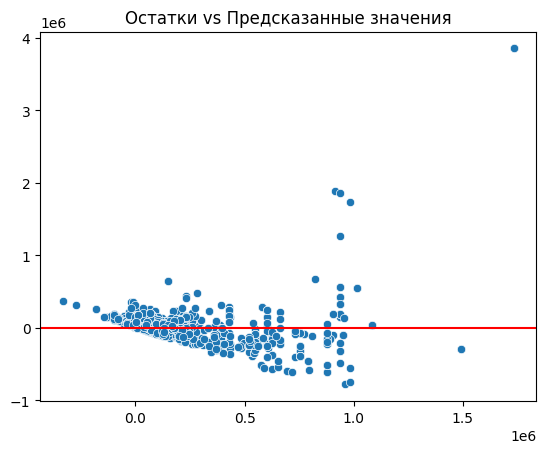

In [32]:
sns.scatterplot(x=model.predict(), y=model.resid)
plt.axhline(0, color='red')
plt.title('Остатки vs Предсказанные значения')
plt.show()

In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"P-value теста Бреуша-Пагана: {bp_test[1]}")
if bp_test[1]>0.05:
  print('Гомоскедатсичность не отвергается')
else:
  print('Гомоскедастичность отвергается')

P-value теста Бреуша-Пагана: 8.517322958735299e-05
Гомоскедастичность отвергается


In [36]:
import scipy.stats as stats
shapiro_test = stats.shapiro(model.resid)
print(f"P-value теста Шапиро-Уилка: {shapiro_test[1]}")
if shapiro_test[1]>0.05:
  print('Остатки нормальны')
else:
  print('Остатки не нормальны')

P-value теста Шапиро-Уилка: 5.6430640944292514e-46
Остатки не нормальны


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
X = df.drop("Цена", axis=1)
X = X.select_dtypes(include=['number'])
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                         feature          VIF
0                               Наличие пыльника     1.837832
1                                         Винтаж     1.310227
2                                Наличие коробки     2.041504
3                            Наличие сертификата     1.714712
4                                        Легенда     1.540640
..                                           ...          ...
130             Ценовая категория_Доступный люкс          inf
131                   Ценовая категория_Люксовые          inf
132      Ценовая категория_Экстремально люксовые          inf
133  Метод производства_Произведенные на фабрике  1959.173881
134         Метод производства_Сделанные вручную          inf

[135 rows x 2 columns]


In [40]:
low_vif_features = vif_data[vif_data["VIF"] < 10]
print(low_vif_features)

                       feature       VIF
0             Наличие пыльника  1.837832
1                       Винтаж  1.310227
2              Наличие коробки  2.041504
3          Наличие сертификата  1.714712
4                      Легенда  1.540640
6                 Бренд_AGNONA  3.054751
19     Бренд_CHARLOTTE OLYMPIA  3.112314
20                 Бренд_CHLOE  7.051704
24     Бренд_COMME DES GARÇONS  3.039910
30                  Бренд_EERA  3.053684
34       Бренд_FABIANA FILIPPI  2.020928
36                 Бренд_FURLA  9.134643
41          Бренд_J.W.ANDERSON  2.052242
43            Бренд_JIL SANDER  7.132690
48             Бренд_LANCASTER  3.039910
58   Бренд_MARC BY MARC JACOBS  2.020928
61              Бренд_MAX MARA  7.118289
67               Бренд_MONCLER  2.064098
68              Бренд_MULBERRY  2.030641
70                 Бренд_NEOUS  4.071393
72                Бренд_NO. 21  2.052242
78          Бренд_RALPH LAUREN  3.063756
83          Бренд_SOPHIE HULME  2.030641
85              

In [41]:
# Выбираем только признаки с VIF < 10 (исключая константу)
good_features = vif_data[(vif_data["VIF"] < 10) & (vif_data["feature"] != "const")]["feature"]
# Добавляем константу обратно
X_filtered = sm.add_constant(X[good_features])

In [44]:
# 8. Запускаем регрессию
model_filt = sm.OLS(y, X_filtered).fit()
print(model_filt.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     10.61
Date:                Sat, 03 May 2025   Prob (F-statistic):           3.35e-52
Time:                        18:04:26   Log-Likelihood:                -14765.
No. Observations:                1051   AIC:                         2.961e+04
Df Residuals:                    1011   BIC:                         2.981e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [29]:
import numpy as np
model_log = sm.OLS(np.log(y), X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     29.81
Date:                Sat, 03 May 2025   Prob (F-statistic):          1.15e-252
Time:                        17:46:01   Log-Likelihood:                -800.48
No. Observations:                1051   AIC:                             1861.
Df Residuals:                     921   BIC:                             2505.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5124      0.754     11.294      0.0

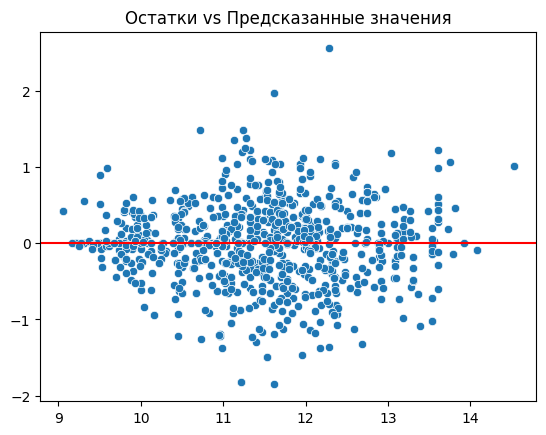

In [31]:
sns.scatterplot(x=model_log.predict(), y=model_log.resid)
plt.axhline(0, color='red')
plt.title('Остатки vs Предсказанные значения')
plt.show()

In [47]:
import scipy.stats as stats
shapiro_test = stats.shapiro(model_log.resid)
print(f"P-value теста Шапиро-Уилка: {shapiro_test[1]}")
if shapiro_test[1]>0.05:
  print('Остатки нормальны')
else:
  print('Остатки не нормальны')

P-value теста Шапиро-Уилка: 7.999900970588398e-08
Остатки не нормальны


In [45]:
# 8. Запускаем регрессию
model_log_filt = sm.OLS(np.log(y), X_filtered).fit()
print(model_log_filt.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     11.73
Date:                Sat, 03 May 2025   Prob (F-statistic):           2.90e-58
Time:                        18:05:15   Log-Likelihood:                -1468.3
No. Observations:                1051   AIC:                             3017.
Df Residuals:                    1011   BIC:                             3215.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

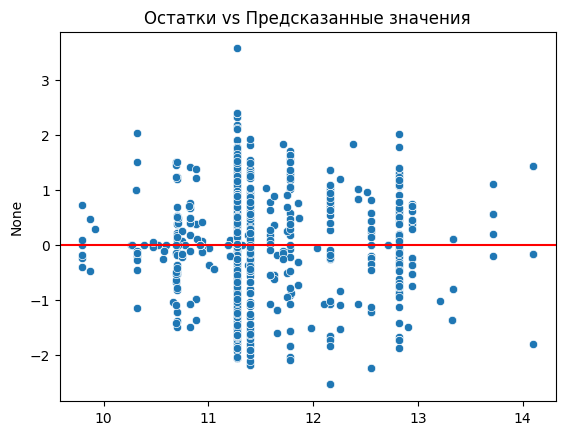

In [46]:
sns.scatterplot(x=model_log_filt.predict(), y=model_log_filt.resid)
plt.axhline(0, color='red')
plt.title('Остатки vs Предсказанные значения')
plt.show()

In [48]:
import scipy.stats as stats
shapiro_test = stats.shapiro(model_log_filt.resid)
print(f"P-value теста Шапиро-Уилка: {shapiro_test[1]}")
if shapiro_test[1]>0.05:
  print('Остатки нормальны')
else:
  print('Остатки не нормальны')

P-value теста Шапиро-Уилка: 2.560858848719872e-07
Остатки не нормальны
